## Evaluating Model Fit

In [74]:
# Let's load in some packages

% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

In [75]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Take a look at the data again
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


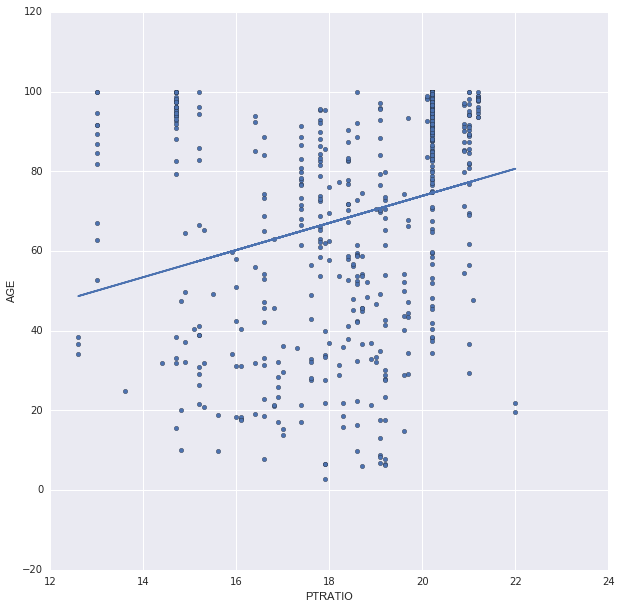

In [76]:
# Fit a line

lm = linear_model.LinearRegression()

X = df[["PTRATIO"]]
y = df["AGE"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("AGE")
plt.xlabel("PTRATIO")

In [77]:
# Scikit-learn makes it easy to get the score
print "r^2:", model.score(X,y)

r^2: 0.0683901013298


## Exercise 1: Compute R Squared for each set of variables

In [78]:
import itertools as it

permut = list(it.permutations(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], 2))

In [79]:
r_sq = []
dict = {}

for item in permut:
    X = df[[item[0]]]
    y = df[item[1]]

    model = lm.fit(X, y)
    
    r_sq.append(model.score(X,y))
    dict[item] = model.score(X,y)


In [80]:
max(dict, key = dict.get)

('TAX', 'RAD')

In [81]:
min(dict, key = dict.get)

('CHAS', 'RAD')

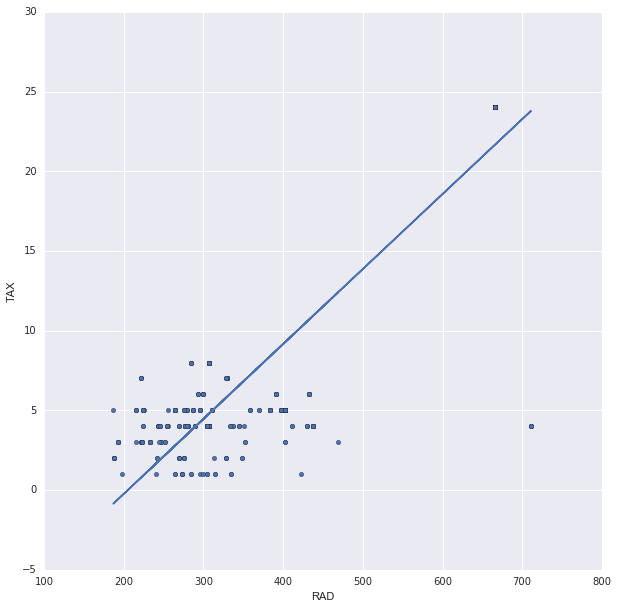

In [82]:
X = df[["TAX"]]
y = df["RAD"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("TAX")
plt.xlabel("RAD")

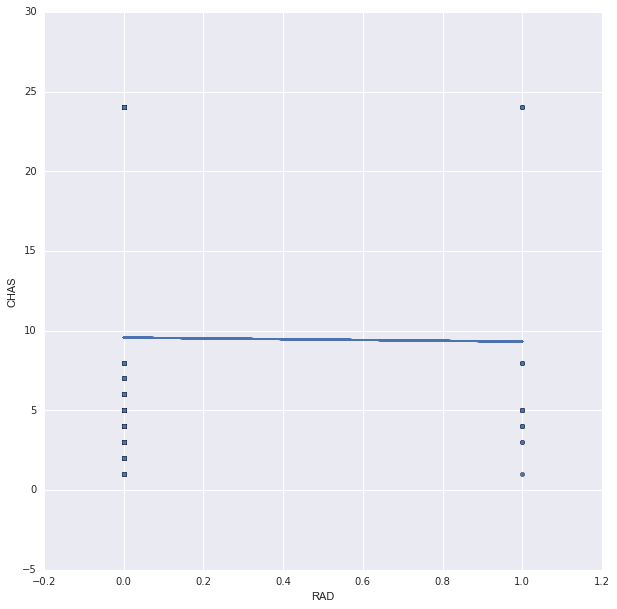

In [83]:
X = df[["CHAS"]]
y = df["RAD"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("CHAS")
plt.xlabel("RAD")

## Exercise 2: Seaborn's Linear Plotting Functions

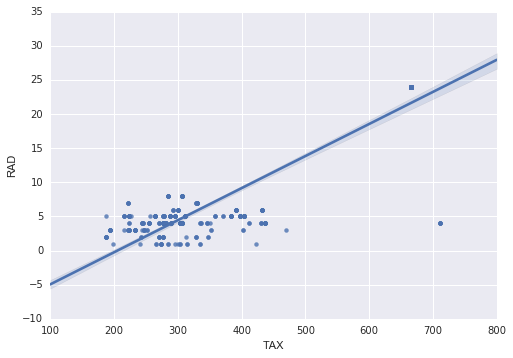

In [84]:
import seaborn as sns
sns.set(color_codes=True)

sns.regplot(x="TAX", y="RAD", data=df)

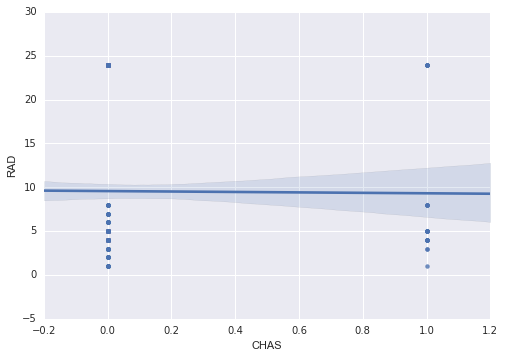

In [85]:
sns.regplot(x="CHAS", y="RAD", data=df)

## Exercise 3: Interpreting R Squared

In [86]:
print "R squared for yesterday's lab was: %r" % 0.73

R squared for yesterday's lab was: 0.73


In [87]:
# Here's some quadratic data with a bit of noise
import scipy

noise = scipy.stats.norm(0, 4)
data = [(x, 3*x*x - 5*x + 3 + noise.rvs()) for x in np.arange(-6, 2, 0.5)]

xs = [x for (x, y) in data]
ys = [y for (x, y) in data]

0.89539561599493389

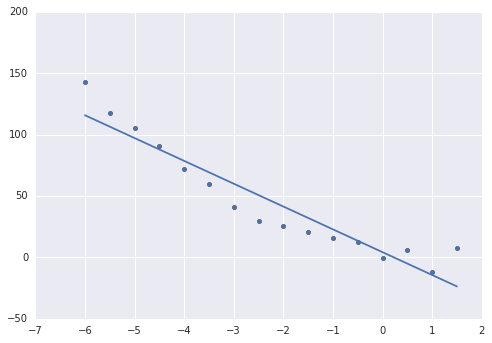

In [88]:
# First a linear
coef = np.polyfit(xs, ys, deg=1)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

0.98807877198352823

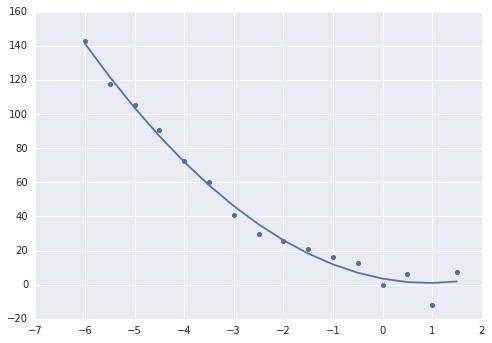

In [89]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)


#### Now let's look at the effect of outliers. Just one outlier can really skew your models. Let's add outlier to our data and redo both the quadratic and the linear fits. Which model type drops the most in r2?

In [90]:
xs.append(2)
ys.append(120)

0.78592993932937028

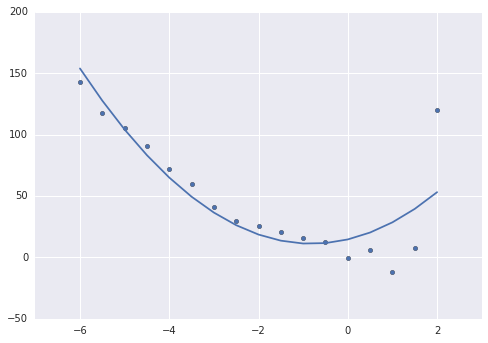

In [91]:
# repeat quadratic fit

coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

0.42646650436008771

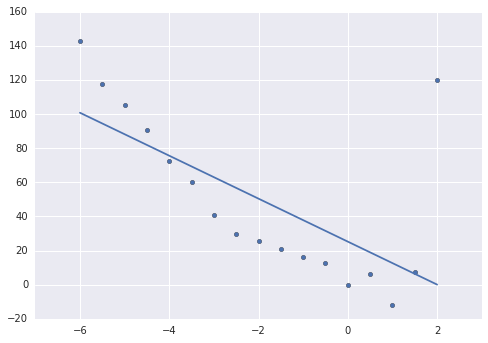

In [92]:
# repeat linear

# First a linear
coef = np.polyfit(xs, ys, deg=1)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

## Additional Exercises

In [93]:
import math
noise = scipy.stats.norm(0, 0.1)
data = [(x, math.sin(x) + noise.rvs() ) for x in np.arange(0, 6 * 3.14, 0.1)]
xs = [x for (x, y) in data]
ys = [y for (x, y) in data]

0.0670670652082
0.0673836860506
0.177458330004
0.177466124093
0.178417552243
0.178590101502
0.678571724502
0.679153559702
0.946511962016
0.947150383974


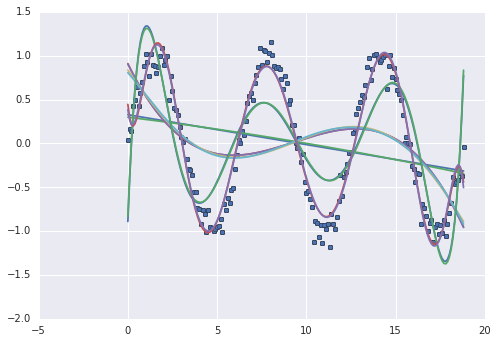

In [109]:
from sklearn import metrics
rs = []

# Let's plot the model
plt.scatter(xs, ys)

for degree in range(1, 11):
    coef = np.polyfit(xs, ys, deg=degree)
    predictions = np.polyval(coef, xs)
    plt.scatter(xs, ys)
    plt.plot(xs, predictions)
    print metrics.r2_score(ys, predictions)
# Make the plots